In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Tetrahymena_Data/Tetrahymena_SJB_90', index_col='Unnamed: 0')

In [3]:
df.shape

(1995, 448)

In [47]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
X = df.drop('Dependent', axis=1)
y = df['Dependent']

In [49]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

## Default RF Parameters

In [106]:
rf = RandomForestRegressor(random_state=42)

Default Parameters 

KFold R2:  0.7502587348679426
KFold MAE:  0.3779010124036851
KFold MSE:  0.27133643608302754
KFold RMSE:  0.5208996410855238


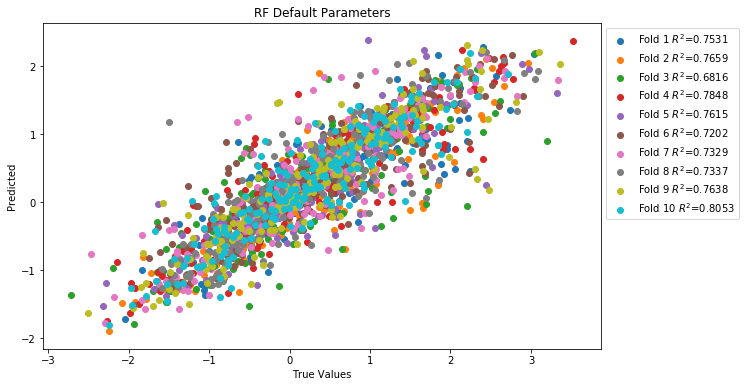

In [107]:
r2_model, mae_model, mse_model, train_r2_model = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('RF Default Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = rf.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_model.append(r2_score(y_test, model.predict(X_test)))
    mae_model.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_model.append(r2_score(y_train, model.predict(X_train)))
    
r2_default = np.mean(r2_model)
mae_default = np.mean(mae_model)
mse_default = np.mean(mse_model)
rmse_default = np.sqrt(mse_default)
train_r2_default = np.mean(train_r2_model)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_Default_Parameters.png', bbox_inches='tight')

print('Default Parameters', '\n')
print('KFold R2: ', r2_default)
print('KFold MAE: ', mae_default)
print('KFold MSE: ', mse_default)
print('KFold RMSE: ', rmse_default)

In [105]:
print(train_r2_default)

0.9644425921155344


# Manual Parameter Tuning

## max_depth
### default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [74]:
max_depth = []
train_r2_md, test_r2_md, mse_md = list(), list(), list()

for i in range(1,50):
    
    max_depth.append(i)   
    rf = RandomForestRegressor(max_depth = i, random_state=42)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = rf.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_md.append(np.mean(train_r2_model))
    test_r2_md.append(np.mean(test_r2_model))
    mse_md.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_md))
print('max_depth: ', max_depth[test_r2_md.index(max(test_r2_md))])
print('Optimal R2 Train: ', train_r2_md[test_r2_md.index(max(test_r2_md))])
print('MSE: ', mse_md[test_r2_md.index(max(test_r2_md))])

Default R2:  0.7502587348679426
Optimal R2 0.7510017051766781
max_depth:  15
Optimal R2 Train:  0.9624657949335083
MSE:  0.27051639054847837


In [113]:
max_depth = list(range(1, 50))

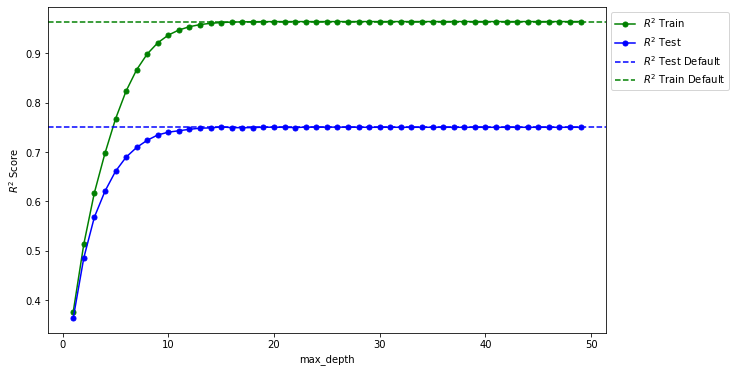

In [114]:
plt.figure(figsize=(10,6))
plt.plot(max_depth, train_r2_md, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(max_depth, test_r2_md, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('max_depth')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_max_depth_R2.png', bbox_inches='tight')

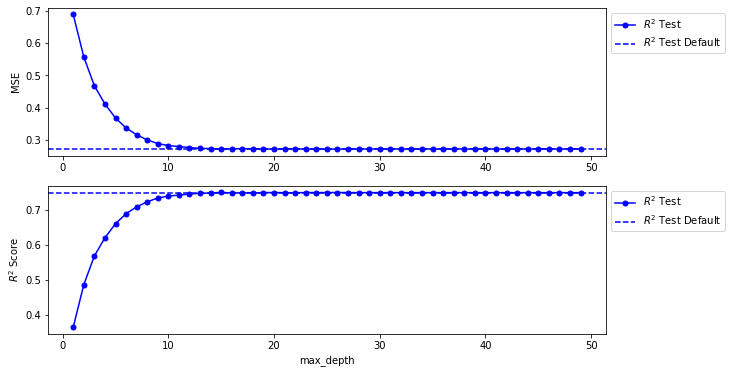

In [115]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(max_depth, test_r2_md, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('max_depth')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(max_depth, mse_md, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_max_depth_MSE_R2.png', bbox_inches='tight')

## min_samples_split
### default=2

The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [78]:
min_samples_split = []
train_r2_mss, test_r2_mss, mse_mss = list(), list(), list()

for i in range(2, 21):
    
    min_samples_split.append(i)
       
    rf = RandomForestRegressor(min_samples_split = i, random_state=42)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = rf.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_mss.append(np.mean(train_r2_model))
    test_r2_mss.append(np.mean(test_r2_model))
    mse_mss.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_mss))
print('min_samples_split: ', min_samples_split[test_r2_mss.index(max(test_r2_mss))])
print('Optimal R2 Train: ', train_r2_mss[test_r2_mss.index(max(test_r2_mss))])
print('MSE: ', mse_mss[test_r2_mss.index(max(test_r2_mss))])

Default R2:  0.7502587348679426
Optimal R2 0.7505268095600599
min_samples_split:  3
Optimal R2 Train:  0.9632336698642409
MSE:  0.27101631027338396


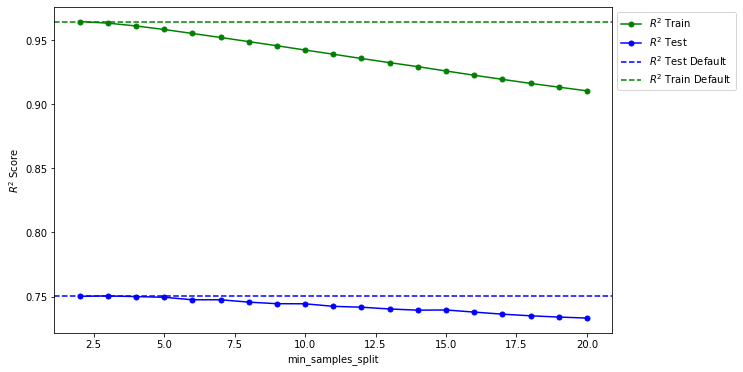

In [117]:
plt.figure(figsize=(10,6))
plt.plot(min_samples_split, train_r2_mss, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(min_samples_split, test_r2_mss, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('min_samples_split')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_min_samples_split_R2.png', bbox_inches='tight')

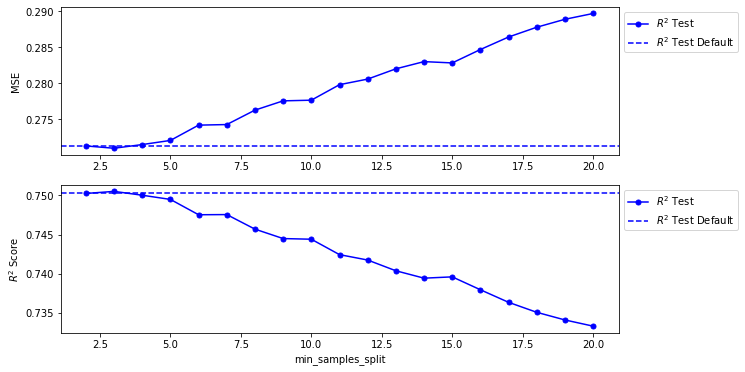

In [118]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(min_samples_split, test_r2_mss, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('min_samples_split')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(min_samples_split, mse_mss, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_min_samples_split_MSE_R2.png', bbox_inches='tight')

## min_samples_leaf
### default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [82]:
min_samples_leaf = []
train_r2_msl, test_r2_msl, mse_msl = list(), list(), list()

for i in range(1, 101, 10):
    
    min_samples_leaf.append(i)
       
    rf = RandomForestRegressor(min_samples_leaf = i, random_state=42)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = rf.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_msl.append(np.mean(train_r2_model))
    test_r2_msl.append(np.mean(test_r2_model))
    mse_msl.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_msl))
print('min_samples_leaf: ', min_samples_leaf[test_r2_msl.index(max(test_r2_msl))])
print('Optimal R2 Train: ', train_r2_msl[test_r2_msl.index(max(test_r2_msl))])
print('MSE: ', mse_msl[test_r2_msl.index(max(test_r2_msl))])

Default R2:  0.7502587348679426
Optimal R2 0.7502587348679426
min_samples_leaf:  1
Optimal R2 Train:  0.9644425921155344
MSE:  0.27133643608302754


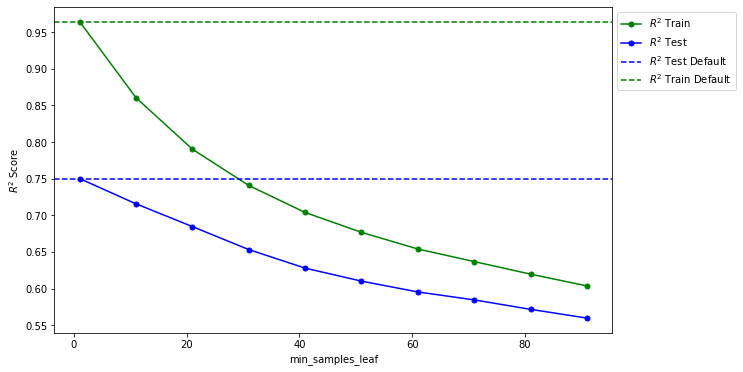

In [120]:
plt.figure(figsize=(10,6))
plt.plot(min_samples_leaf, train_r2_msl, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(min_samples_leaf, test_r2_msl, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('min_samples_leaf')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_min_samples_leaf_R2.png', bbox_inches='tight')

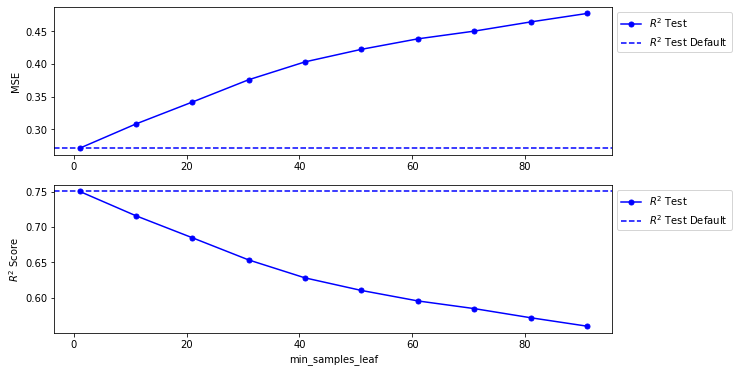

In [121]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(min_samples_leaf, test_r2_msl, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('min_samples_leaf')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(min_samples_leaf, mse_msl, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_min_samples_leaf_MSE_R2.png', bbox_inches='tight')

## max_leaf_nodes
### default=None

Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [85]:
max_leaf_nodes = []
train_r2_mln, test_r2_mln, mse_mln = list(), list(), list()

for i in range(2, 210, 10):
    
    max_leaf_nodes.append(i)
       
    rf = RandomForestRegressor(max_leaf_nodes = i, random_state=42)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = rf.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_mln.append(np.mean(train_r2_model))
    test_r2_mln.append(np.mean(test_r2_model))
    mse_mln.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_mln))
print('max_leaf_nodes: ', max_leaf_nodes[test_r2_mln.index(max(test_r2_mln))])
print('Optimal R2 Train: ', train_r2_mln[test_r2_mln.index(max(test_r2_mln))])
print('MSE: ', mse_mln[test_r2_mln.index(max(test_r2_mln))])

Default R2:  0.7502587348679426
Optimal R2 0.7465086961663825
max_leaf_nodes:  202
Optimal R2 Train:  0.9516990135337942
MSE:  0.27536376828841264


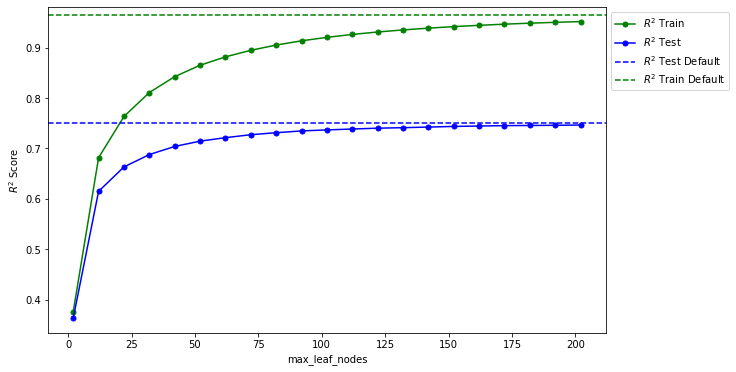

In [123]:
plt.figure(figsize=(10,6))
plt.plot(max_leaf_nodes, train_r2_mln, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(max_leaf_nodes, test_r2_mln, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('max_leaf_nodes')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_max_leaf_nodes_R2.png', bbox_inches='tight')

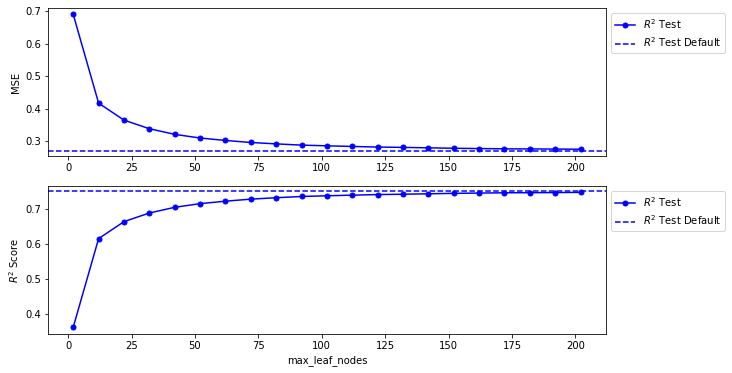

In [124]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(max_leaf_nodes, test_r2_mln, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('max_leaf_nodes')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(max_leaf_nodes, mse_mln, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_max_leaf_nodes_MSE_R2.png', bbox_inches='tight')

## n_estimators
### default=100

The number of trees in the forest.

In [88]:
n_estimators = []
train_r2_ne, test_r2_ne, mse_ne = list(), list(), list()

for i in range(50, 500, 10):
    
    n_estimators.append(i)       
    rf = RandomForestRegressor(n_estimators = i, random_state=42)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = rf.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_ne.append(np.mean(train_r2_model))
    test_r2_ne.append(np.mean(test_r2_model))
    mse_ne.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_ne))
print('n_estimators: ', n_estimators[test_r2_ne.index(max(test_r2_ne))])
print('Optimal R2 Train: ', train_r2_ne[test_r2_ne.index(max(test_r2_ne))])
print('MSE: ', mse_ne[test_r2_ne.index(max(test_r2_ne))])

Default R2:  0.7502587348679426
Optimal R2 0.7532969547279365
n_estimators:  490
Optimal R2 Train:  0.9658819556461944
MSE:  0.2678099197635897


In [129]:
n_estimators = list(range(50, 500, 10))

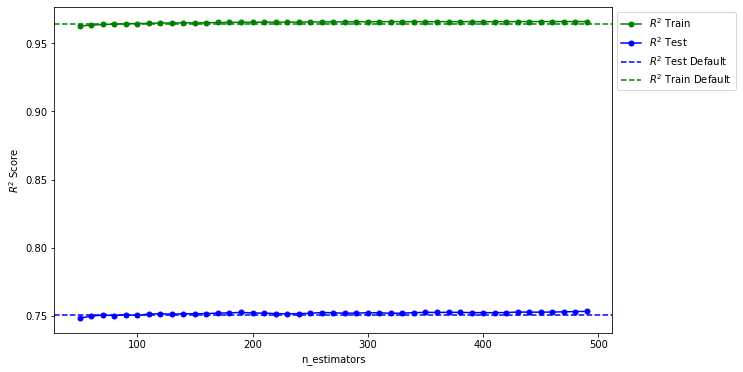

In [130]:
plt.figure(figsize=(10,6))
plt.plot(n_estimators, train_r2_ne, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(n_estimators, test_r2_ne, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('n_estimators')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_n_estimators_R2.png', bbox_inches='tight')

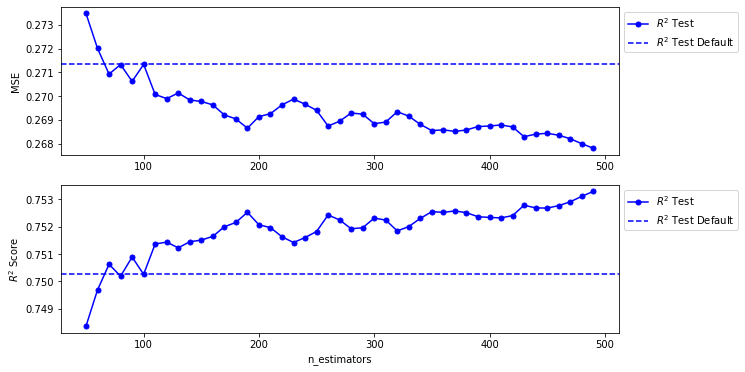

In [131]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(n_estimators, test_r2_ne, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(n_estimators, mse_ne, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_n_estimators_MSE_R2.png', bbox_inches='tight')

## max_samples
### default=None
If bootstrap is True, the number of samples to draw from X to train each base estimator.

If None (default), then draw X.shape[0] samples.

If int, then draw max_samples samples.

If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0, 1).

In [91]:
max_samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
train_r2_ms, test_r2_ms, mse_ms = list(), list(), list()

for i in max_samples:
       
    rf = RandomForestRegressor(max_samples = i, random_state=42)
    train_r2_model, test_r2_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model = rf.fit(X_train, y_train)
    
        train_r2_model.append(r2_score(y_train, model.predict(X_train)))
        test_r2_model.append(r2_score(y_test, model.predict(X_test)))
        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    train_r2_ms.append(np.mean(train_r2_model))
    test_r2_ms.append(np.mean(test_r2_model))
    mse_ms.append(np.mean(mse_model)) 

print('Default R2: ', r2_default)
print('Optimal R2', max(test_r2_ms))
print('max_samples: ', max_samples[test_r2_ms.index(max(test_r2_ms))])
print('Optimal R2 Train: ', train_r2_ms[test_r2_ms.index(max(test_r2_ms))])
print('MSE: ', mse_ms[test_r2_ms.index(max(test_r2_ms))])

Default R2:  0.7502587348679426
Optimal R2 0.7515074837718743
max_samples:  0.99
Optimal R2 Train:  0.9637731655149413
MSE:  0.26991478029055427


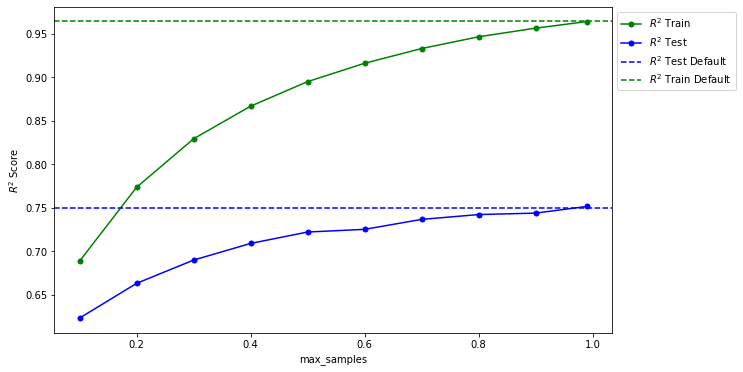

In [132]:
plt.figure(figsize=(10,6))
plt.plot(max_samples, train_r2_ms, color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5,label='$R^2$ Train')
plt.plot(max_samples, test_r2_ms, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.xlabel('max_samples')
plt.ylabel('$R^2$ Score')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_max_samples_R2.png', bbox_inches='tight')

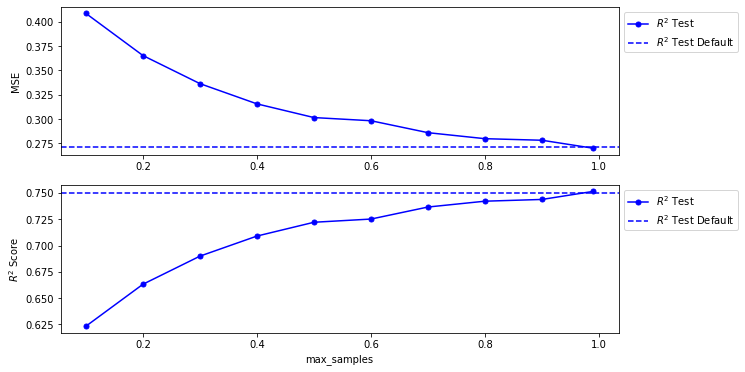

In [133]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6))
ax2.plot(max_samples, test_r2_ms, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax2.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax2.set_xlabel('max_samples')
ax2.set_ylabel('$R^2$ Score')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.plot(max_samples, mse_ms, color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
ax1.axhline(mse_default, linestyle='--', color='b', label='$R^2$ Test Default')
ax1.set_ylabel('MSE')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_max_samples_MSE_R2.png', bbox_inches='tight')

## Optimal Parameters

Manual Parameters 

KFold R2 Test:  0.7529845799071616
KFold R2 Train:  0.9619560379427666
KFold MAE:  0.3756334124212608
KFold MSE:  0.26816576603030723
KFold RMSE:  0.5178472419838762


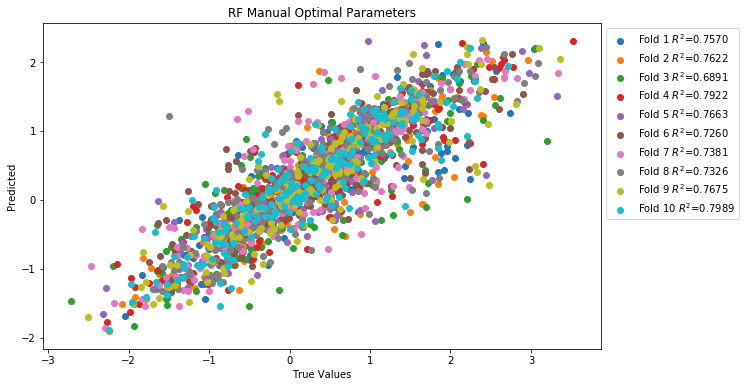

In [94]:
rf_mopt = RandomForestRegressor(max_depth=15, min_samples_split=3, n_estimators=490, max_samples=0.99, random_state=42)
r2_mopt, mae_mopt, mse_mopt, train_r2_mopt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('RF Manual Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = rf_mopt.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_mopt.append(r2_score(y_test, model.predict(X_test)))
    mae_mopt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_mopt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_mopt.append(r2_score(y_train, model.predict(X_train)))
    
r2_manual = np.mean(r2_mopt)
mae_manual = np.mean(mae_mopt)
mse_manual = np.mean(mse_mopt)
rmse_manual = np.sqrt(mse_manual)
train_r2_manual = np.mean(train_r2_mopt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_Manual_Parameters.png', bbox_inches='tight')

print('Manual Parameters', '\n')
print('KFold R2 Test: ', r2_manual)
print('KFold R2 Train: ', train_r2_manual)
print('KFold MAE: ', mae_manual)
print('KFold MSE: ', mse_manual)
print('KFold RMSE: ', rmse_manual)

Although better performance than default parameters, this score is lower than when just n_estimators was optimised.

# GridSearch Parameter Tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [98]:
max_depth = list(range(10, 31))
n_estimators = list(range(100, 510, 10))

param_grid = {'max_depth': max_depth,
              'n_estimators': n_estimators}

In [99]:
cv = KFold(n_splits=10, shuffle=True, random_state=101)
rf_gs = RandomForestRegressor(random_state=42)

random_grid = RandomizedSearchCV(estimator=rf_gs, 
                                 param_distributions=param_grid, 
                                 cv=cv, 
                                 n_iter=50,
                                 scoring='r2',  
                                 verbose=3,
                                 return_train_score=True,
                                 random_state=42)

In [100]:
random_grid.fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] n_estimators=270, max_depth=27 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=270, max_depth=27, score=(train=0.965, test=0.758), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=270, max_depth=27, score=(train=0.965, test=0.765), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[CV]  n_estimators=270, max_depth=27, score=(train=0.967, test=0.685), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................
[CV]  n_estimators=270, max_depth=27, score=(train=0.965, test=0.794), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................
[CV]  n_estimators=270, max_depth=27, score=(train=0.966, test=0.762), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................
[CV]  n_estimators=270, max_depth=27, score=(train=0.966, test=0.730), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................
[CV]  n_estimators=270, max_depth=27, score=(train=0.965, test=0.734), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................
[CV]  n_estimators=270, max_depth=27, score=(train=0.965, test=0.731), total= 1.1min
[CV] n_estimators=270, max_depth=27 ..................................
[CV]  n_estimators=270, max_depth=27, score=(train=0.966, test=0

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 1085.0min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=...
                   iid='deprecat

In [101]:
random_grid.best_params_

{'n_estimators': 490, 'max_depth': 30}

GridSearch Parameters 

KFold Test R2:  0.7533074673840168
KFold Train R2:  0.9658823121740122
KFold MAE:  0.3747961852077794
KFold MSE:  0.26779782693214277
KFold RMSE:  0.5174918617061941


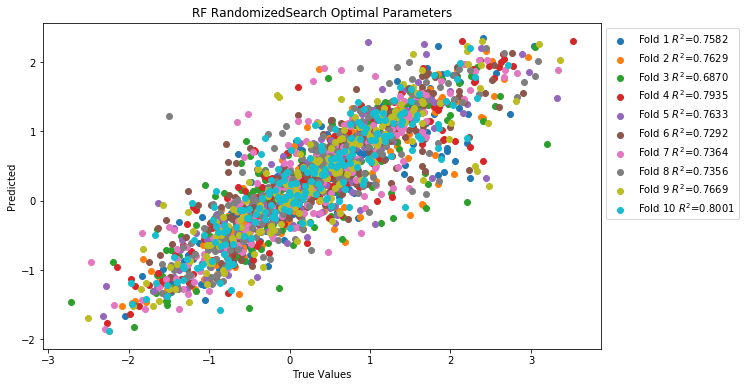

In [145]:
rf_gsopt = random_grid.best_estimator_
r2_gsopt, mae_gsopt, mse_gsopt, train_r2_gsopt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('RF RandomizedSearch Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = rf_gsopt.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_gsopt.append(r2_score(y_test, model.predict(X_test)))
    mae_gsopt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_gsopt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_gsopt.append(r2_score(y_train, model.predict(X_train)))
    
r2_grid = np.mean(r2_gsopt)
mae_grid = np.mean(mae_gsopt)
mse_grid = np.mean(mse_gsopt)
rmse_grid = np.sqrt(mse_grid)
train_r2_grid = np.mean(train_r2_gsopt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_Random_Parameters.png', bbox_inches='tight')

print('GridSearch Parameters', '\n')
print('KFold Test R2: ', r2_grid)
print('KFold Train R2: ', train_r2_grid)
print('KFold MAE: ', mae_grid)
print('KFold MSE: ', mse_grid)
print('KFold RMSE: ', rmse_grid)

In [103]:
gs_cv = pd.DataFrame(random_grid.cv_results_)

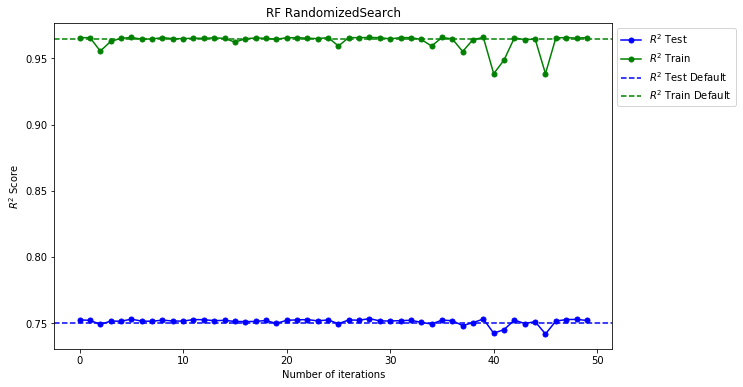

In [104]:
plt.figure(figsize=(10,6))
plt.plot(gs_cv['mean_test_score'], color='b', linestyle='-', marker='o', markerfacecolor='b', markersize=5, label='$R^2$ Test')
plt.plot(gs_cv['mean_train_score'], color='g', linestyle='-', marker='o', markerfacecolor='g', markersize=5, label='$R^2$ Train')
plt.axhline(r2_default, linestyle='--', color='b', label='$R^2$ Test Default')
plt.axhline(train_r2_default, linestyle='--', color='g', label='$R^2$ Train Default')
plt.ylabel('$R^2$ Score')
plt.xlabel('Number of iterations')
plt.title('RF RandomizedSearch')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_RandomizedSearchCV.png', bbox_inches='tight')

# Optuna Parameter Tuning

In [134]:
import optuna

In [135]:
def objective(trial):
    
    df = pd.read_csv('../Tetrahymena_Data/Tetrahymena_SJB_90', index_col = 'Unnamed: 0')
    
    X = df.drop('Dependent', axis=1)
    y = df['Dependent']
    kf = KFold(n_splits=10, shuffle=True, random_state=101)
    kf.split(X)
    
    rf_md = trial.suggest_int('max_depth', 10, 30)
    rf_ne = trial.suggest_int('n_estimators', 100, 500)
    rf = RandomForestRegressor(max_depth=rf_md, n_estimators=rf_ne, random_state=42)
    
    r2_model, r2_train_model, mse_model = list(), list(), list()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = rf.fit(X_train, y_train)

        mse_model.append(mean_squared_error(y_test, model.predict(X_test)))
    
    return np.mean(mse_model)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-06-14 10:29:18,777] A new study created in memory with name: no-name-17b1c89d-6555-40f2-8fe6-1047ca399841
[I 2021-06-14 10:34:06,973] Trial 0 finished with value: 0.27123059256137405 and parameters: {'max_depth': 17, 'n_estimators': 121}. Best is trial 0 with value: 0.27123059256137405.
[I 2021-06-14 10:42:32,382] Trial 1 finished with value: 0.2699017046239983 and parameters: {'max_depth': 21, 'n_estimators': 211}. Best is trial 1 with value: 0.2699017046239983.
[I 2021-06-14 10:55:38,671] Trial 2 finished with value: 0.2699618465810615 and parameters: {'max_depth': 14, 'n_estimators': 352}. Best is trial 1 with value: 0.2699017046239983.
[I 2021-06-14 11:09:20,782] Trial 3 finished with value: 0.2712838340132865 and parameters: {'max_depth': 13, 'n_estimators': 377}. Best is trial 1 with value: 0.2699017046239983.
[I 2021-06-14 11:15:12,821] Trial 4 finished with value: 0.2802182057895529 and parameters: {'max_depth': 10, 'n_estimators': 186}. Best is trial 1 with value: 0.26

'max_depth': 27, 'n_estimators': 499

In [137]:
rf_optuna = RandomForestRegressor(max_depth=27, n_estimators=499, random_state=42)

Optuna Parameters 

KFold R2:  0.7534273147962984
KFold MAE:  0.37478950231681324
KFold MSE:  0.26766969548891495
KFold RMSE:  0.5173680464513777


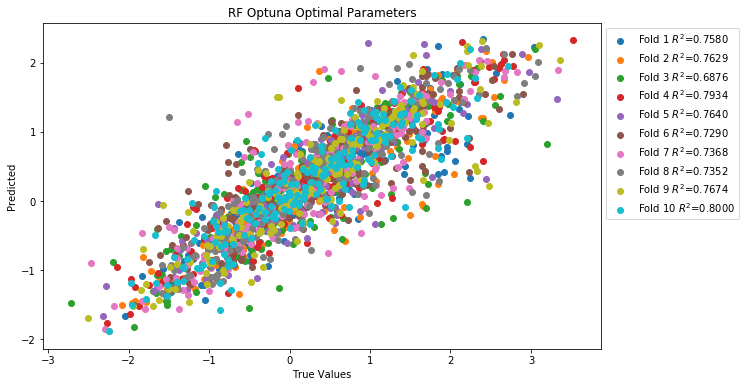

In [138]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

r2_opt, mae_opt, mse_opt, train_r2_opt = list(), list(), list(), list()

plt.figure(figsize=(10,6))
plt.title('RF Optuna Optimal Parameters')
plt.ylabel('Predicted')
plt.xlabel('True Values')

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = rf_optuna.fit(X_train, y_train)
    
    lab = 'Fold %d $R^2$=%.4f' % (i+1, r2_score(y_test, model.predict(X_test)))
    plt.scatter(y_test, model.predict(X_test), label=lab)
    
    r2_opt.append(r2_score(y_test, model.predict(X_test)))
    mae_opt.append(mean_absolute_error(y_test, model.predict(X_test)))
    mse_opt.append(mean_squared_error(y_test, model.predict(X_test)))
    train_r2_opt.append(r2_score(y_train, model.predict(X_train)))
    
r2_optuna = np.mean(r2_opt)
mae_optuna = np.mean(mae_opt)
mse_optuna = np.mean(mse_opt)
rmse_optuna = np.sqrt(mse_optuna)
train_r2_optuna = np.mean(train_r2_opt)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Graphs/RF_Optuna.png', bbox_inches='tight')

print('Optuna Parameters', '\n')
print('KFold R2: ', r2_optuna)
print('KFold MAE: ', mae_optuna)
print('KFold MSE: ', mse_optuna)
print('KFold RMSE: ', rmse_optuna)

In [143]:
print('KFold Train R2: ', train_r2_optuna)

KFold Train R2:  0.9658780229969338


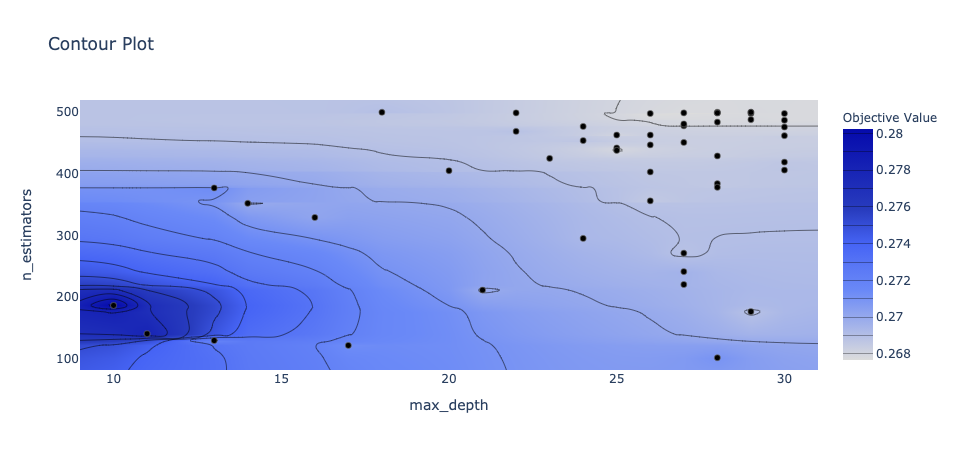

In [139]:
optuna.visualization.plot_contour(study)

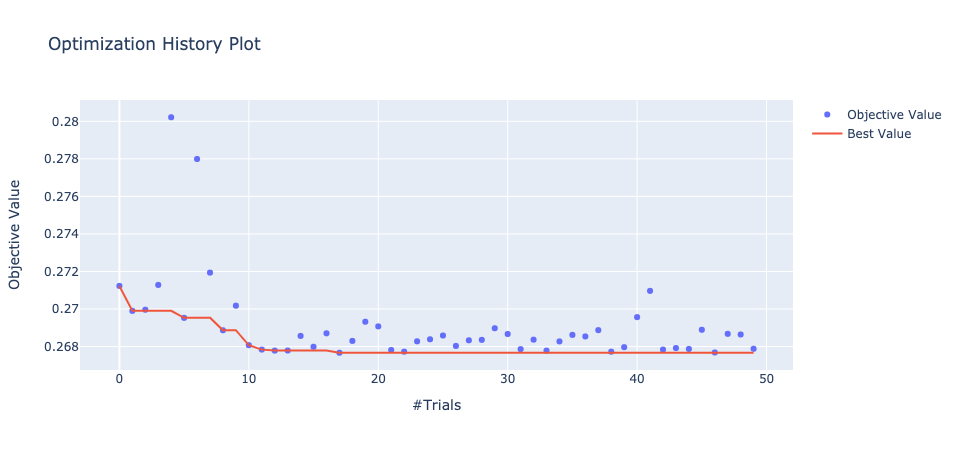

In [140]:
optuna.visualization.plot_optimization_history(study)

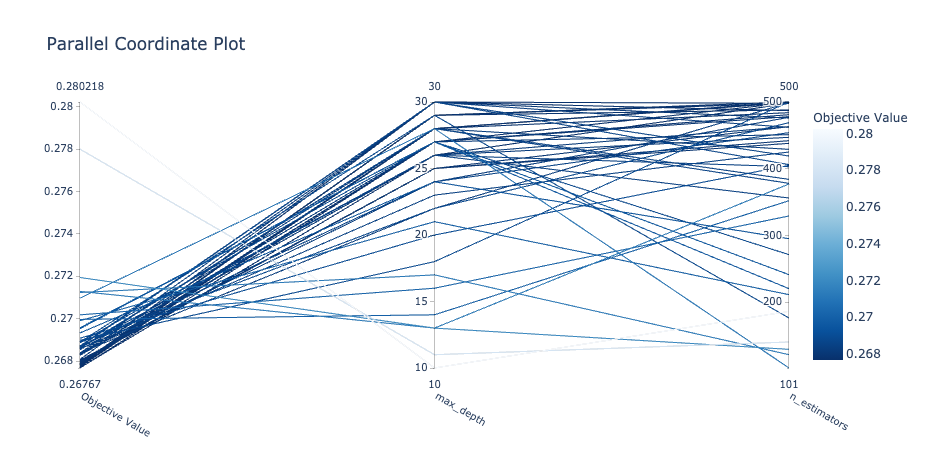

In [141]:
optuna.visualization.plot_parallel_coordinate(study)

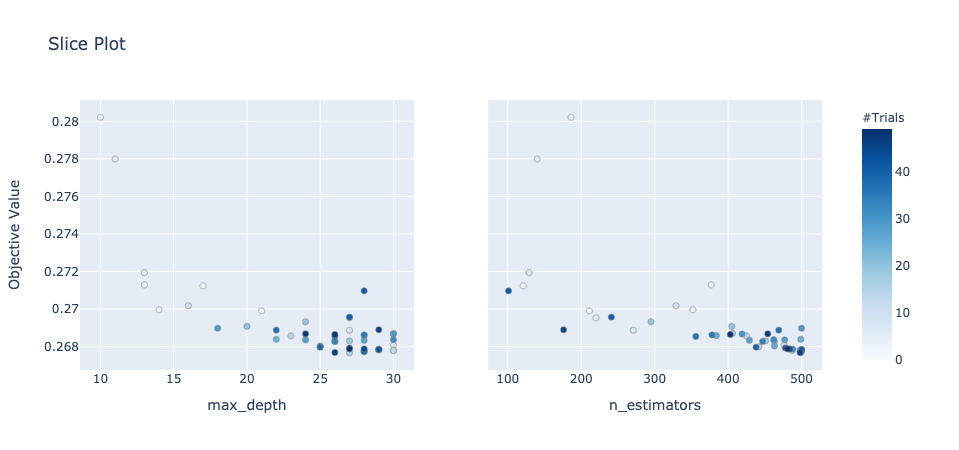

In [142]:
optuna.visualization.plot_slice(study)

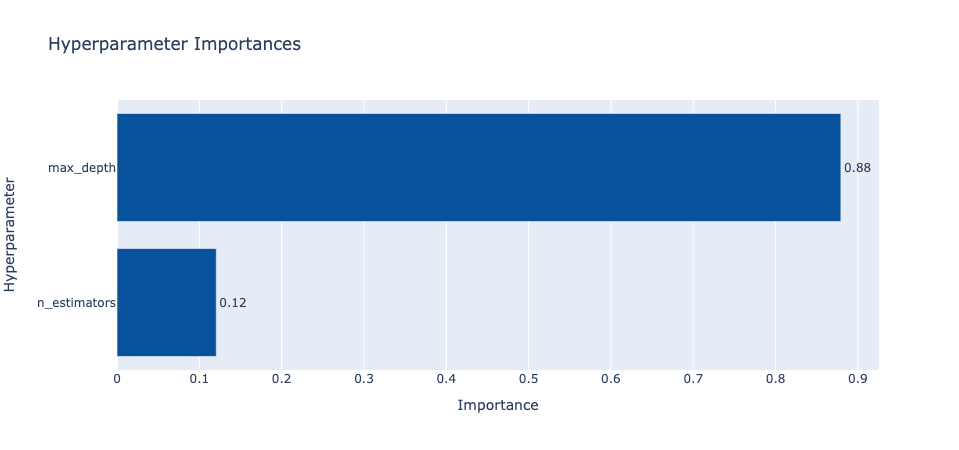

In [144]:
optuna.visualization.plot_param_importances(study)